# Problem Description
The project focuses on credit card fraud detection. The dataset contains various features such as transaction time, anonymized PCA-transformed transaction attributes (V1-V28), transaction amount, and a binary 'Class' label indicating whether the transaction is fraudulent or not. The objective of this project is to use the K-means clustering algorithm to analyze the patterns within the transaction features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Data Exploration and Cleaning

### Load Data

In [2]:
creditcard = pd.read_csv("./data/creditcard.csv")

In [3]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

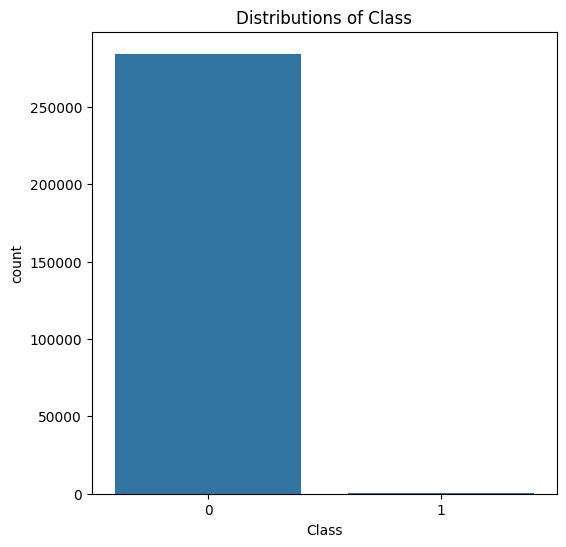

In [5]:
# Distributions of Class
plt.figure(figsize=(6,6))
sns.countplot(x="Class", data=creditcard)
plt.title("Distributions of Class")
plt.show()

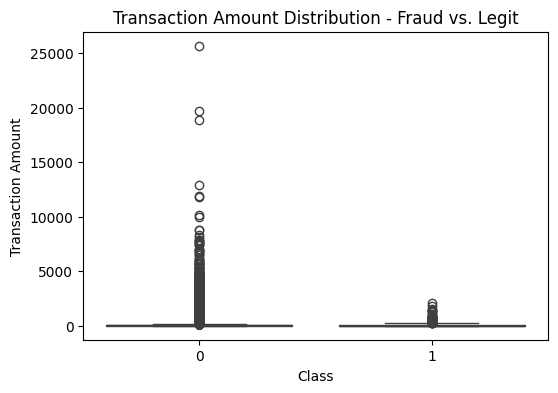

In [6]:
# Check if there's relationship between amount and class
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=creditcard)
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution - Fraud vs. Legit')
plt.show()

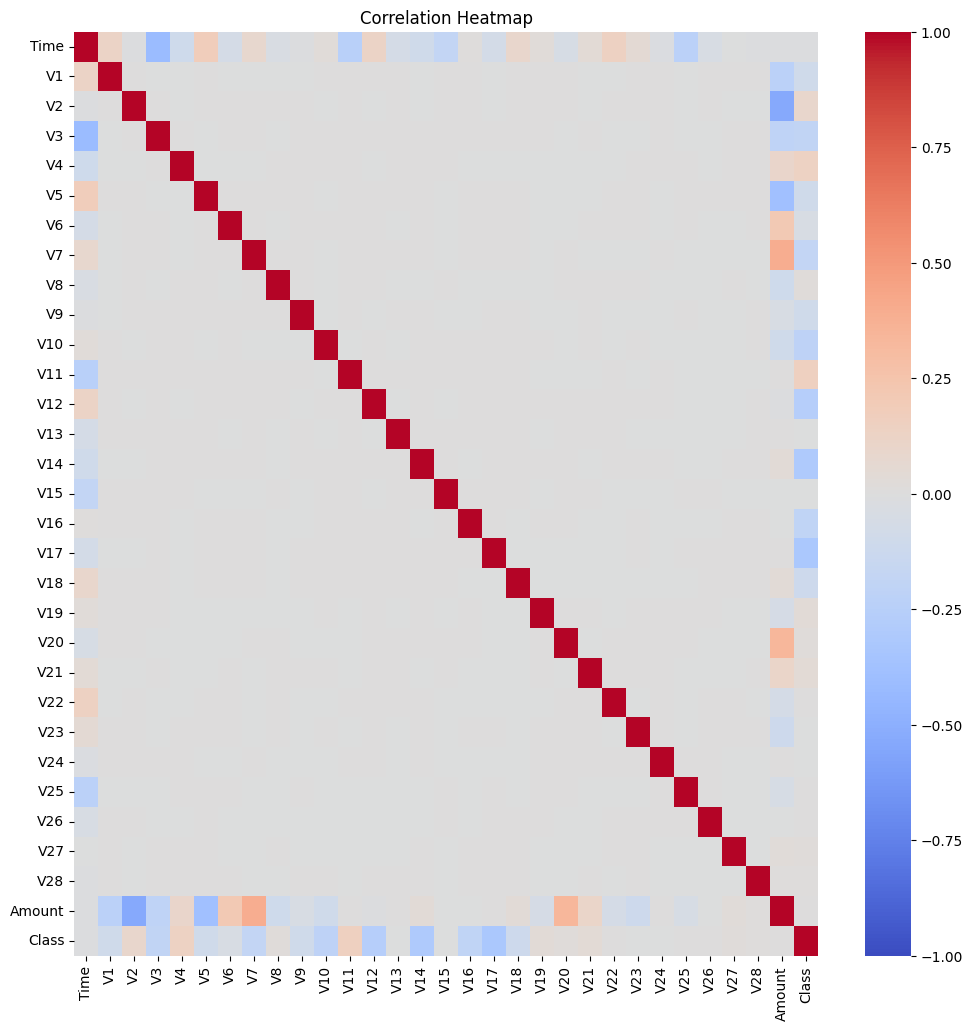

In [7]:
# Correlation heatmap for features
plt.figure(figsize=(12, 12))
corr_matrix = creditcard.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Heatmap')
plt.show()

### Data Cleaning

In [8]:
data = creditcard
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Split data into majority (legitimate) and minority (fraudulent)
legit = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

# Randomly sample the legitimate data to match the number with fradulent
legit_balanced = legit.sample(n = len(fraud), random_state=65)

# Combine the balanced legitimate with the fraudulent
data_balanced = pd.concat([legit_balanced, fraud]).reset_index(drop=True)
data_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,60170.0,1.278028,0.287796,0.064251,0.577404,-0.150078,-0.771282,0.061726,-0.151069,0.122937,...,-0.322115,-0.962744,0.060011,-0.202535,0.272614,0.128076,-0.027684,0.026027,9.99,0
1,45741.0,1.150290,0.172246,0.153060,0.894549,0.072640,0.046593,-0.007321,0.083921,-0.203748,...,0.203800,0.612604,-0.200135,-0.280420,0.696455,-0.187500,0.024462,0.004826,20.00,0
2,63578.0,1.191441,0.342295,0.422303,0.716189,-0.311134,-0.781002,0.039556,-0.106295,-0.047710,...,-0.234761,-0.625985,0.195247,0.369830,0.112128,0.102779,-0.003728,0.031395,1.29,0
3,152819.0,-2.809614,2.352288,-1.948182,-2.058727,1.386042,3.513996,-1.381299,2.494819,0.458842,...,-0.100525,-0.739046,0.168784,0.551301,-0.118996,-0.312958,-0.751493,-0.141007,1.85,0
4,118398.0,1.967273,-0.271064,-1.279592,0.189266,-0.176274,-1.105671,0.109516,-0.246289,0.216236,...,0.283417,0.802408,0.021860,0.142274,-0.015021,0.759566,-0.103470,-0.074429,39.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### K-means Clustering

In [10]:
train, test = train_test_split(data_balanced, test_size=0.2, random_state=65)

X_train = train.drop("Class", axis=1)

model = KMeans(n_clusters=2, random_state=65)
train['Cluster'] = model.fit_predict(X_train)

# Assuming cluster 0 corresponds to class 0, and cluster 1 corresponds to class 1
cluster_mapping = {0: 0, 1: 1}
train['Cluster'] = train['Cluster'].map(cluster_mapping)

accuracy = (train['Class'] == train['Cluster']).mean()
print(f'{cluster_mapping} Accuracy: {accuracy:.4f}')

# Assuming cluster 0 corresponds to class 1, and cluster 1 corresponds to class 0
cluster_mapping = {0: 1, 1: 0}
train['Cluster'] = train['Cluster'].map(cluster_mapping)

accuracy = (train['Class'] == train['Cluster']).mean()
print(f'{cluster_mapping} Accuracy: {accuracy:.4f}')

C:\Users\19179\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 0, 1: 1} Accuracy: 0.5642
{0: 1, 1: 0} Accuracy: 0.4358


### Data Cleaning

In [11]:
corr_matrix2 = creditcard.corr()
high_corr_features2 = corr_matrix[abs(corr_matrix2['Class']) > 0.1]['Class']

print("Features with correlation higher than 0.1:")
print(high_corr_features2)

Features with correlation higher than 0.1:
V1      -0.101347
V3      -0.192961
V4       0.133447
V7      -0.187257
V10     -0.216883
V11      0.154876
V12     -0.260593
V14     -0.302544
V16     -0.196539
V17     -0.326481
V18     -0.111485
Class    1.000000
Name: Class, dtype: float64


In [12]:
# Drop unnecessary column
data2 = creditcard[["V1", "V3", "V4", "V7", "V10", "V11", "V12", "V14", "V16", "V17", "V18", "Class"]]
data2

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,-9.834783,-2.066656,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,-0.732789,2.035030,-0.738589,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,1.919565,-3.249640,-0.557828,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,-0.240440,0.702510,0.689799,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


In [13]:
# Split data into majority (legitimate) and minority (fraudulent)
legit2 = data2[data2['Class'] == 0]
fraud2 = data2[data2['Class'] == 1]

# Randomly sample the legitimate data to match the number with fradulent
legit_balanced2 = legit2.sample(n = len(fraud2), random_state=65)

# Combine the balanced legitimate with the fraudulent
data_balanced2 = pd.concat([legit_balanced2, fraud2]).reset_index(drop=True)
data_balanced2

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,1.278028,0.064251,0.577404,0.061726,-0.275118,-0.608152,-0.133746,-0.246156,0.653256,-0.179811,-0.077943,0
1,1.150290,0.153060,0.894549,-0.007321,0.143850,1.187298,0.764105,0.590831,0.069037,-0.530781,0.156370,0
2,1.191441,0.422303,0.716189,0.039556,-0.337556,0.507331,0.618058,-0.311040,0.074279,0.370948,-0.898362,0
3,-2.809614,-1.948182,-2.058727,-1.381299,-0.902277,-0.263396,0.418079,-0.475637,0.795007,0.818271,0.354250,0
4,1.967273,-1.279592,0.189266,0.109516,0.339582,1.018388,0.619292,0.729995,0.231490,-0.658721,0.240381,0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.927883,-4.518331,1.749293,-0.882850,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,1
980,1.378559,-5.004247,1.411850,-1.413170,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,1
981,-0.676143,-2.213700,0.468308,-2.234739,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,1
982,-3.113832,-5.399730,1.817092,-2.208002,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,1


### K-means Clustering

In [14]:
train2, test2 = train_test_split(data_balanced2, test_size=0.2, random_state=65)

X_train2 = train2.drop("Class", axis=1)

model2 = KMeans(n_clusters=2, random_state=65)
train2['Cluster'] = model2.fit_predict(X_train2)

# Assuming cluster 0 corresponds to class 0, and cluster 1 corresponds to class 1
cluster_mapping2 = {0: 0, 1: 1}
train2['Cluster'] = train2['Cluster'].map(cluster_mapping2)

accuracy2 = (train2['Class'] == train2['Cluster']).mean()
print(f'{cluster_mapping2} Accuracy: {accuracy2:.4f}')

# Assuming cluster 0 corresponds to class 1, and cluster 1 corresponds to class 0
cluster_mapping2 = {0: 1, 1: 0}
train2['Cluster'] = train2['Cluster'].map(cluster_mapping2)

accuracy2 = (train2['Class'] == train2['Cluster']).mean()
print(f'{cluster_mapping2} Accuracy: {accuracy2:.4f}')

{0: 0, 1: 1} Accuracy: 0.3316
{0: 1, 1: 0} Accuracy: 0.6684


C:\Users\19179\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Data Cleaning

In [15]:
corr_matrix3 = creditcard.corr()
high_corr_features3 = corr_matrix3[abs(corr_matrix3['Class']) > 0.15]['Class']

print("Features with correlation higher than 0.15:")
print(high_corr_features3)

Features with correlation higher than 0.15:
V3      -0.192961
V7      -0.187257
V10     -0.216883
V11      0.154876
V12     -0.260593
V14     -0.302544
V16     -0.196539
V17     -0.326481
Class    1.000000
Name: Class, dtype: float64


In [16]:
# Drop unnecessary column
data3 = creditcard[["V3", "V7", "V10", "V11", "V12", "V14", "V16", "V17", "Class"]]
data3

,V3,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0
...,...,...,...,...,...,...,...,...,...
284802,-9.834783,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0
284803,2.035030,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,0
284804,-3.249640,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0
284805,0.702510,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,0


In [17]:
# Split data into majority (legitimate) and minority (fraudulent)
legit3 = data3[data3['Class'] == 0]
fraud3 = data3[data3['Class'] == 1]

# Randomly sample the legitimate data to match the number with fradulent
legit_balanced3 = legit3.sample(n = len(fraud3), random_state=65)

# Combine the balanced legitimate with the fraudulent
data_balanced3 = pd.concat([legit_balanced3, fraud3]).reset_index(drop=True)
data_balanced3

,V3,V7,V10,V11,V12,V14,V16,V17,Class
0,0.064251,0.061726,-0.275118,-0.608152,-0.133746,-0.246156,0.653256,-0.179811,0
1,0.153060,-0.007321,0.143850,1.187298,0.764105,0.590831,0.069037,-0.530781,0
2,0.422303,0.039556,-0.337556,0.507331,0.618058,-0.311040,0.074279,0.370948,0
3,-1.948182,-1.381299,-0.902277,-0.263396,0.418079,-0.475637,0.795007,0.818271,0
4,-1.279592,0.109516,0.339582,1.018388,0.619292,0.729995,0.231490,-0.658721,0
...,...,...,...,...,...,...,...,...,...
979,-4.518331,-0.882850,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,1
980,-5.004247,-1.413170,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,1
981,-2.213700,-2.234739,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,1
982,-5.399730,-2.208002,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,1


### K-means Clustering

In [18]:
train3, test3 = train_test_split(data_balanced3, test_size=0.2, random_state=65)

X_train3 = train3.drop("Class", axis=1)

model3 = KMeans(n_clusters=2, random_state=65)
train3['Cluster'] = model3.fit_predict(X_train3)

# Assuming cluster 0 corresponds to class 0, and cluster 1 corresponds to class 1
cluster_mapping3 = {0: 0, 1: 1}
train3['Cluster'] = train3['Cluster'].map(cluster_mapping3)

accuracy3 = (train3['Class'] == train3['Cluster']).mean()
print(f'{cluster_mapping3} Accuracy: {accuracy3:.4f}')

# Assuming cluster 0 corresponds to class 1, and cluster 1 corresponds to class 0
cluster_mapping3 = {0: 1, 1: 0}
train3['Cluster'] = train3['Cluster'].map(cluster_mapping3)

accuracy3 = (train3['Class'] == train3['Cluster']).mean()
print(f'{cluster_mapping3} Accuracy: {accuracy3:.4f}')

{0: 0, 1: 1} Accuracy: 0.3291
{0: 1, 1: 0} Accuracy: 0.6709


C:\Users\19179\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Data Cleaning

In [19]:
corr_matrix4 = creditcard.corr()
high_corr_features4 = corr_matrix4[abs(corr_matrix4['Class']) > 0.2]['Class']

print("Features with correlation higher than 0.2:")
print(high_corr_features4)

Features with correlation higher than 0.2:
V10     -0.216883
V12     -0.260593
V14     -0.302544
V17     -0.326481
Class    1.000000
Name: Class, dtype: float64


In [20]:
# Drop unnecessary column
data4 = creditcard[["V10", "V12", "V14", "V17", "Class"]]
data4

,V10,V12,V14,V17,Class
0,0.090794,-0.617801,-0.311169,0.207971,0
1,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.207643,0.066084,-0.165946,1.109969,0
3,-0.054952,0.178228,-0.287924,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691,0
284803,-0.975926,0.915802,-0.675143,-0.025693,0
284804,-0.484782,0.063119,-0.510602,0.313502,0
284805,-0.399126,-0.962886,0.449624,0.509928,0


In [21]:
# Split data into majority (legitimate) and minority (fraudulent)
legit4 = data4[data4['Class'] == 0]
fraud4 = data4[data4['Class'] == 1]

# Randomly sample the legitimate data to match the number with fradulent
legit_balanced4 = legit4.sample(n = len(fraud4), random_state=65)

# Combine the balanced legitimate with the fraudulent
data_balanced4 = pd.concat([legit_balanced4, fraud4]).reset_index(drop=True)
data_balanced4

,V10,V12,V14,V17,Class
0,-0.275118,-0.133746,-0.246156,-0.179811,0
1,0.143850,0.764105,0.590831,-0.530781,0
2,-0.337556,0.618058,-0.311040,0.370948,0
3,-0.902277,0.418079,-0.475637,0.818271,0
4,0.339582,0.619292,0.729995,-0.658721,0
...,...,...,...,...,...
979,-5.587794,-5.417424,-6.665177,-4.570529,1
980,-3.232153,-3.096915,-5.210141,-3.267116,1
981,-3.463891,-2.775022,-4.057162,-5.035326,1
982,-5.245984,-5.030465,-6.416628,-4.614717,1


### K-Means Clustering

In [22]:
train4, test4 = train_test_split(data_balanced4, test_size=0.2, random_state=65)

X_train4 = train4.drop("Class", axis=1)

model4 = KMeans(n_clusters=2, random_state=65)
train4['Cluster'] = model4.fit_predict(X_train4)

# Assuming cluster 0 corresponds to class 0, and cluster 1 corresponds to class 1
cluster_mapping4 = {0: 0, 1: 1}
train4['Cluster'] = train4['Cluster'].map(cluster_mapping4)

accuracy4 = (train4['Class'] == train4['Cluster']).mean()
print(f'{cluster_mapping4} Accuracy: {accuracy4:.4f}')

# Assuming cluster 0 corresponds to class 1, and cluster 1 corresponds to class 0
cluster_mapping4 = {0: 1, 1: 0}
train4['Cluster'] = train4['Cluster'].map(cluster_mapping4)

accuracy4 = (train4['Class'] == train4['Cluster']).mean()
print(f'{cluster_mapping4} Accuracy: {accuracy4:.4f}')

{0: 0, 1: 1} Accuracy: 0.2236
{0: 1, 1: 0} Accuracy: 0.7764


C:\Users\19179\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Data Cleaning

In [23]:
corr_matrix5 = creditcard.corr()
high_corr_features5 = corr_matrix5[abs(corr_matrix5['Class']) > 0.25]['Class']

print("Features with correlation higher than 0.25:")
print(high_corr_features5)

Features with correlation higher than 0.25:
V12     -0.260593
V14     -0.302544
V17     -0.326481
Class    1.000000
Name: Class, dtype: float64


In [24]:
# Drop unnecessary column
data5 = creditcard[["V12", "V14", "V17", "Class"]]
data5

,V12,V14,V17,Class
0,-0.617801,-0.311169,0.207971,0
1,1.065235,-0.143772,-0.114805,0
2,0.066084,-0.165946,1.109969,0
3,0.178228,-0.287924,-0.684093,0
4,0.538196,-1.119670,-0.237033,0
...,...,...,...,...
284802,2.711941,4.626942,1.991691,0
284803,0.915802,-0.675143,-0.025693,0
284804,0.063119,-0.510602,0.313502,0
284805,-0.962886,0.449624,0.509928,0


In [25]:
# Split data into majority (legitimate) and minority (fraudulent)
legit5 = data5[data5['Class'] == 0]
fraud5 = data5[data5['Class'] == 1]

# Randomly sample the legitimate data to match the number with fradulent
legit_balanced5 = legit5.sample(n = len(fraud5), random_state=65)

# Combine the balanced legitimate with the fraudulent
data_balanced5 = pd.concat([legit_balanced5, fraud5]).reset_index(drop=True)
data_balanced5

,V12,V14,V17,Class
0,-0.133746,-0.246156,-0.179811,0
1,0.764105,0.590831,-0.530781,0
2,0.618058,-0.311040,0.370948,0
3,0.418079,-0.475637,0.818271,0
4,0.619292,0.729995,-0.658721,0
...,...,...,...,...
979,-5.417424,-6.665177,-4.570529,1
980,-3.096915,-5.210141,-3.267116,1
981,-2.775022,-4.057162,-5.035326,1
982,-5.030465,-6.416628,-4.614717,1


### K-Means Clustering

In [26]:
train5, test5 = train_test_split(data_balanced5, test_size=0.2, random_state=65)

X_train5 = train5.drop("Class", axis=1)

model5 = KMeans(n_clusters=2, random_state=65)
train5['Cluster'] = model5.fit_predict(X_train5)

# Assuming cluster 0 corresponds to class 0, and cluster 1 corresponds to class 1
cluster_mapping5 = {0: 0, 1: 1}
train5['Cluster'] = train5['Cluster'].map(cluster_mapping5)

accuracy5 = (train5['Class'] == train5['Cluster']).mean()
print(f'{cluster_mapping5} Accuracy: {accuracy5:.5f}')

# Assuming cluster 0 corresponds to class 1, and cluster 1 corresponds to class 0
cluster_mapping5 = {0: 1, 1: 0}
train5['Cluster'] = train5['Cluster'].map(cluster_mapping5)

accuracy5 = (train5['Class'] == train5['Cluster']).mean()
print(f'{cluster_mapping5} Accuracy: {accuracy5:.5f}')

{0: 0, 1: 1} Accuracy: 0.22236
{0: 1, 1: 0} Accuracy: 0.77764


C:\Users\19179\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


I desgined the model with no filter and filter the features by using correlations 0.1, 0.15, 0.2, and 0.25. As we can see, the result accuracy increased as correltation filter gets higher. I choose not to continue because it would end up with too less features, which would not make the result relevent to this dataset.